## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = complete_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#column index references
TIMEPOINT = 1
MOUSE_ID = 0
#df of just the 2 columns we want to look at
dupe_hunt_df = complete_df[["Mouse ID", "Timepoint"]]
#dict for keeping track of values we've seen and list for tracking confirmed duplicates
mouse_dict = {}
dupe_id = []
#loop over our new df adding unique values to our dict and duplicate IDs to our list
for i in range(len(dupe_hunt_df)):
    if dupe_hunt_df.iloc[i,MOUSE_ID] not in mouse_dict:
        mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]] = []
    if dupe_hunt_df.iloc[i,TIMEPOINT] in mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]]:
        dupe_id.append(dupe_hunt_df.iloc[i,MOUSE_ID])
    else:
        mouse_dict[dupe_hunt_df.iloc[i,MOUSE_ID]].append(dupe_hunt_df.iloc[i,TIMEPOINT])

print(dupe_id)

['g989', 'g989', 'g989', 'g989', 'g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data_df = complete_df.loc[complete_df["Mouse ID"].isin(dupe_id),:]
dupe_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[~complete_df["Mouse ID"].isin(dupe_id)]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_group = clean_df.groupby("Drug Regimen")
summary_df = summary_group.agg({"Tumor Volume (mm3)": ['mean', 'median','var','std','sem']})
summary_df.columns = ["Volume Mean","Median Volume","Volume Variance","Volume SD", "SEM"]
summary_df


,Volume Mean,Median Volume,Volume Variance,Volume SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

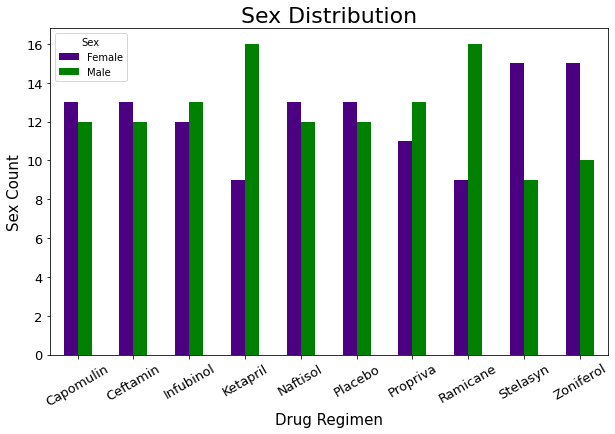

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
sex_group = clean_df.groupby(["Drug Regimen","Sex"])
sex_chart_df = sex_group["Mouse ID"].nunique().unstack()

ax = sex_chart_df.plot.bar(figsize = (10,6), fontsize = 13, color = ["indigo","green"], rot = 30)
ax.set_title("Sex Distribution", fontsize = 22)
ax.set_ylabel("Sex Count", fontsize = 15)
ax.set_xlabel("Drug Regimen", fontsize = 15)

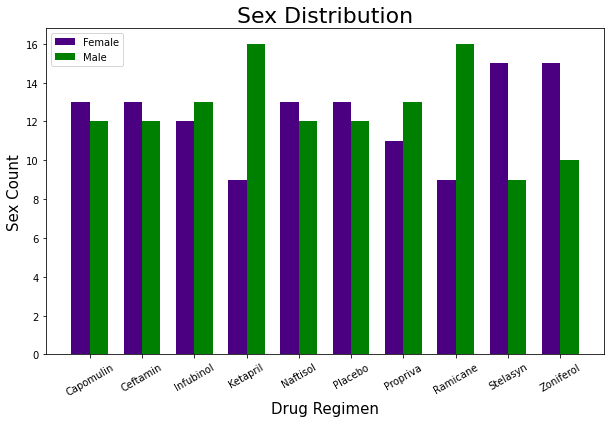

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_labels = sex_chart_df.index
y_axis = {
    "Male" : sex_chart_df["Male"].values,
    "Female": sex_chart_df["Female"].values
}

width = 0.35
x_pos = np.arange(len(y_axis["Male"]))

fig, ax = plt.subplots(figsize = (10,6))

plt.bar(x_pos, y_axis["Female"], width, label = "Female", color = "indigo")
plt.bar(x_pos + width, y_axis["Male"], width, label = "Male", color = "green")

plt.xticks(x_pos + width / 2, x_labels, rotation = 30)
plt.title("Sex Distribution", fontsize = 22)
plt.ylabel("Sex Count", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.legend(loc="best")
plt.show()

Text(0, 0.5, 'Sex Count')

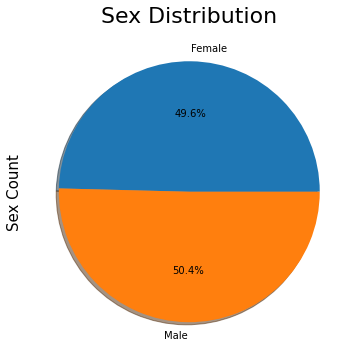

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax = sex_chart_df.sum().plot.pie(figsize = (10,6), shadow = True, autopct="%1.1f%%")
ax.set_title("Sex Distribution", fontsize = 22)
ax.set_ylabel("Sex Count", fontsize = 15)

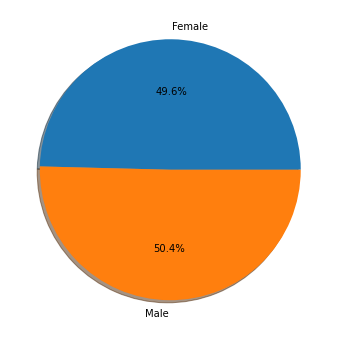

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_chart_df.columns
wedges = [sex_chart_df["Female"].sum(),sex_chart_df["Male"].sum()]

fig, ax = plt.subplots(figsize = (10,6))

plt.pie(wedges, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs_df = complete_df.loc[complete_df["Drug Regimen"].isin(regimens_list),:]

# Start by getting the last (greatest) timepoint for each mouse
max_time_mouse_df = drugs_df.groupby("Mouse ID", as_index=False)["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volumes_df = clean_df.merge(max_time_mouse_df, how = "inner", on=['Mouse ID','Timepoint'])
final_volumes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [47]:
# Calculate the quartiles and IQR and quantitatively determine
# if there are any potential outliers across all four treatment regimens

# Get a series of just volumes
all_volumes = final_volumes_df["Tumor Volume (mm3)"]
# find our quartiles and print
quartiles = all_volumes.quantile([.25,.5,.75])
print(f"The lower quartile is {quartiles[.25].round(6)}.")
print(f"The upper quartile is {quartiles[.75].round(6)}.")
# calculate iqr and print
iqr = quartiles[0.75] - quartiles[0.25]
print(f"The IQR is {iqr.round(6)}.")
# calculate bounds and print
lower_bound = quartiles[0.25] - (1.5*iqr)
upper_bound = quartiles[0.75] + (1.5*iqr)
print(f"The lower and upper bounds are {lower_bound.round(6)} and {upper_bound.round(6)}, respectively.")
    

The lower quartile is 37.187744.
The upper quartile is 59.930262.
The IQR is 22.742518.
The lower and upper bounds are 3.073967 and 94.044039, respectively.


In [61]:
# Search for any potential outliers
#Make a list to store outliers
potential_outliers = []
#cast all volumes to a list and loop over the values
for volume in list(all_volumes):
    #if a volume falls outside the bounds, add it to the potential_outliers list
    if volume > upper_bound or volume < lower_bound:
        potential_outliers.append(volume)
#print our results
print(f"There are {len(potential_outliers)} potential outliers.")
if potential_outliers:
    print("They are as follows:")
    for outlier in potential_outliers:
        print(outlier)

There are 0 potential outliers.


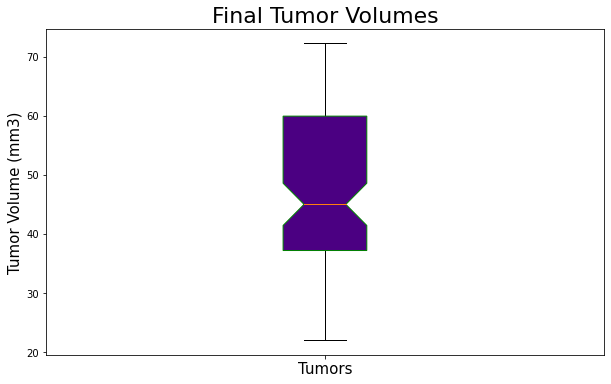

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(all_volumes, patch_artist = True, notch = True,
          boxprops = {"facecolor" : "indigo", "color" : "green"})
ax.set_title("Final Tumor Volumes", fontsize = 22)
ax.set_ylabel("Tumor Volume (mm3)", fontsize = 15)
ax.set_xticklabels(["Tumors"], fontsize = 15)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
